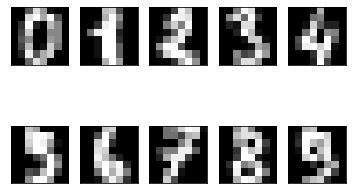

In [2]:
# load library

from sklearn.datasets import load_digits
import matplotlib
import matplotlib.pyplot as plt



# matplotlib 설정
matplotlib.rc('font', family='AppleGothic') # 한글 출력
plt.rcParams['axes.unicode_minus'] = False # 축 - 설정

# data load
digits = load_digits()

# subplot 객체 생성
fig, axes = plt.subplots(2, 5, #  subplot객체(2x5)를 axes에 할당
                         subplot_kw={'xticks':(), 'yticks':()}) # subplot 축 눈금 해제

for ax, img in zip(axes.ravel(), digits.images): # axes.ravel()과 digits.images를 하나씩 할당
    ax.imshow(img)

plt.gray() # 그래프 흑백
plt.show() # 그래프 출력

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


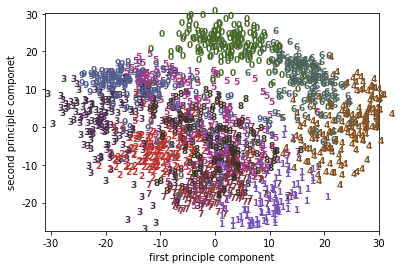

In [3]:
from sklearn.decomposition import PCA

# PCA 모델을 생성
pca = PCA(n_components=2) # 주성분 갯수
pca.fit(digits.data) # PCA 적용

# 처음 두 개의 주성분으로 숫자 데이터를 변환
digits_pca = pca.transform(digits.data) # PCA를 데이터에 적용
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
               '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

for i in range(len(digits.data)): # digits.data의 길이까지 정수 갯수
    # 숫자 텍스트를 이용해 산점도 그리기
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), # x, y, 그룹; str은 문자로 변환
             color=colors[digits.target[i]], # 산점도 색상
             fontdict={'weight':'bold', 'size':9}) # font 설정
plt.xlim(digits_pca[:, 0].min(), digits_pca[:,1].max()) # 최소, 최대
plt.ylim(digits_pca[:, 1].min(), digits_pca[:,1].max()) # 최소, 최대
plt.xlabel('first principle component') # x 축 이름
plt.ylabel('second principle componet') # y 축 이름
plt.show()

C:\Users\hu612\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hu612\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hu612\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hu612\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


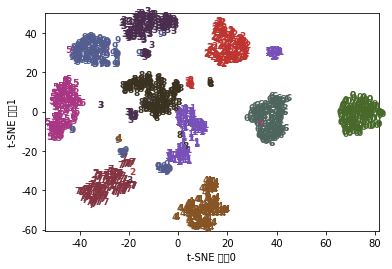

In [4]:
# library import
from sklearn.manifold import TSNE

# t-SNE 모델 생성 및 학습
tsne = TSNE(random_state=0)
digits_tsne = tsne.fit_transform(digits.data)

# 시각화
for i in range(len(digits.data)): # 0부터  digits.data까지 정수
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), # x, y , 그룹
             color=colors[digits.target[i]], # 색상
             fontdict={'weight': 'bold', 'size':9}) # font
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대
plt.xlabel('t-SNE 특성0') # x축 이름
plt.ylabel('t-SNE 특성1') # y축 이름
plt.show() # 그래프 출력



https://woolulu.tistory.com/43

perplexity: 값이 크면 더 많은 이웃을 포함하여 작은 그룹은 무시

                       기본값 = 30

                       보통 5~50사이의 값을 가짐



early_exaggeration: 원본 공간의 클러스터들이 얼마나 멀게 2차원에 나타낼지를 정함, 기본값은 4

                                         최소한 1보다 커야하고 값이 클수록 간격이 커짐